In [1]:
from tensorflow import keras
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [2]:
# imdb 데이터 불러오기
# 단어사전은 500개까지만 가져옴.
# 원핫인코딩하면 500개 컬럼이 만들어짐.
(train_input,train_target),(test_input,test_target) = keras.datasets.imdb.load_data(
    num_words = 500
)

In [3]:
print(train_input.shape,test_input.shape)

(25000,) (25000,)


In [4]:
# 2진 분류: 긍정 - 1 , 부정 - 0
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [5]:
# 1의 의미: 토큰 시작
# 2의 의미: 단어사전에 없는 단어
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [6]:
train_input,val_input,train_target,val_target = train_test_split(
    train_input,train_target,test_size=0.2,random_state=42
)

In [7]:
print(train_input.shape,val_input.shape)

(20000,) (5000,)


In [8]:
lengths = np.array([len(x) for x in train_input])
lengths

array([259, 520, 290, ..., 300,  70,  77])

In [9]:
# 평균값 / 중간값
print(np.mean(lengths),np.median(lengths))

239.00925 178.0


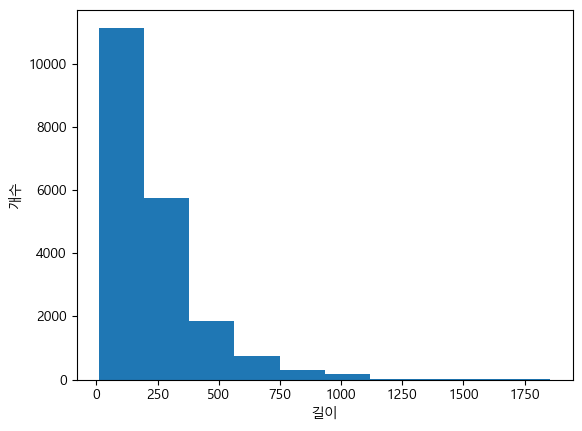

In [10]:
plt.hist(lengths)
plt.xlabel('길이')
plt.ylabel('개수')
plt.show()

In [11]:
# 시퀀스 패딩
# 글자의 수를 제한해서 없는 부분은 0으로 채워줌
# 최대 글자수 100개 제한
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input,maxlen=100)

In [12]:
# 20000개 샘플, 크기 100
train_seq.shape

(20000, 100)

In [13]:
# 시퀀스 패딩 적용해서 0이 없으면 글자 짤린것임.
print(train_seq[0])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [14]:
# 시퀀스 패딩은 100개 이상의 글자를 짜를때 앞부분을 짜름(뒤 내용이 더 중요판단)
print(train_seq[0][-10:])

[  6   2  46   7  14  20  10  10 470 158]


In [15]:
# 6번째 샘플은 앞부분 0으로 채워져 있음.
# 100개 단어보다 적은 데이터임.
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [16]:
# 검증세트 - 시퀀스 패딩
val_seq = pad_sequences(val_input,maxlen=100)

In [17]:
# 순환 신경망 모델 구현
model = keras.Sequential()
# 순환 신경망 알고리즘
# 시퀀스 패딩 - 100 크기, 단어사전 - 500개
model.add(keras.layers.SimpleRNN(8,input_shape=(100,500)))
# 이진분류
model.add(keras.layers.Dense(1,activation='sigmoid'))

c:\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
# fit 훈련 데이터 3차원 행렬
train_seq[0]

array([ 10,   4,  20,   9,   2, 364, 352,   5,  45,   6,   2,   2,  33,
       269,   8,   2, 142,   2,   5,   2,  17,  73,  17, 204,   5,   2,
        19,  55,   2,   2,  92,  66, 104,  14,  20,  93,  76,   2, 151,
        33,   4,  58,  12, 188,   2, 151,  12, 215,  69, 224, 142,  73,
       237,   6,   2,   7,   2,   2, 188,   2, 103,  14,  31,  10,  10,
       451,   7,   2,   5,   2,  80,  91,   2,  30,   2,  34,  14,  20,
       151,  50,  26, 131,  49,   2,  84,  46,  50,  37,  80,  79,   6,
         2,  46,   7,  14,  20,  10,  10, 470, 158])

In [19]:
train_oh = keras.utils.to_categorical(train_seq)

In [20]:
train_seq[0][0:20]

array([ 10,   4,  20,   9,   2, 364, 352,   5,  45,   6,   2,   2,  33,
       269,   8,   2, 142,   2,   5,   2])

In [21]:
# 원핫인코딩 된 값 출력 - 10번째 값이 1로 변경
train_oh[0][0][:12]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [22]:
# 500개 컬럼의 합은 무조건 1 - 원핫인코딩
print(np.sum(train_oh[0][0]))

1.0


In [23]:
# val_seq
val_oh = keras.utils.to_categorical(val_seq)

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 8)              │         4,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,081 (15.94 KB)

 Trainable params: 4,081 (15.94 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# 인공신경망 훈련과 동일
# 원핫인코딩해서 Flatten 필요없음.
rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer=rmsprop,loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('simpleRnn_model.keras')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
history = model.fit(train_oh,train_target,batch_size=64,epochs=100,
                    validation_data=(val_oh,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.5057 - loss: 0.6984 - val_accuracy: 0.5046 - val_loss: 0.6960
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5176 - loss: 0.6929 - val_accuracy: 0.5210 - val_loss: 0.6917
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5538 - loss: 0.6853 - val_accuracy: 0.5766 - val_loss: 0.6797
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6036 - loss: 0.6740 - val_accuracy: 0.6150 - val_loss: 0.6700
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6270 - loss: 0.6648 - val_accuracy: 0.6366 - val_loss: 0.6598
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6568 - loss: 0.6528 - val_accuracy: 0.6630 - val_loss: 0.6479
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6817 - loss: 0.6387 - val_accuracy: 0.6820 - val_loss: 0.6356
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6945 - loss: 0.6274 - 

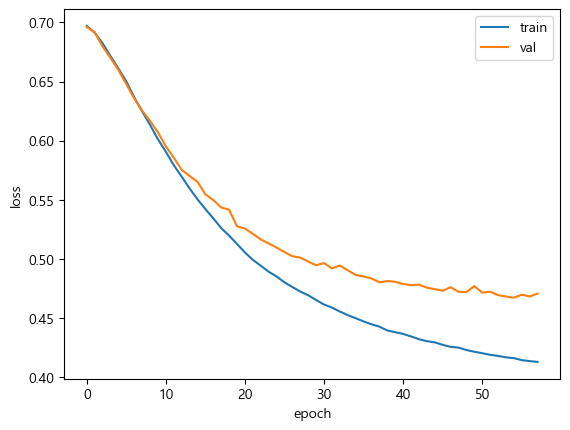

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [27]:
# stop 위치 출력
early_stopping_cb.stopped_epoch

57

In [28]:
model.evaluate(val_oh,val_target)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7794 - loss: 0.4684


[0.46707871556282043, 0.7775999903678894]

In [29]:
# test_input
test_seq = pad_sequences(test_input,maxlen=100)

In [30]:
test_oh = keras.utils.to_categorical(test_seq)

In [31]:
model.evaluate(test_oh,test_target)

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7892 - loss: 0.4619


[0.4625837504863739, 0.7865999937057495]

단어 임베딩 

In [32]:
model2 = keras.Sequential()
# 임베딩층 추가
model2.add(keras.layers.Embedding(500,16,input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1,activation='sigmoid'))
model2.summary()

c:\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [33]:
# 인공신경망 훈련과 동일
# Flatten 필요없음.
# 원핫인코딩을 사용하지않음. - 임베딩층 사용
# train_oh => train_seq 데이터 사용
rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001)
model2.compile(optimizer=rmsprop,loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('simpleRnn_embedding_model.keras')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
history = model2.fit(train_seq,train_target,batch_size=64,epochs=100,
                    validation_data=(val_seq,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5053 - loss: 0.6934 - val_accuracy: 0.5034 - val_loss: 0.6940
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5256 - loss: 0.6916 - val_accuracy: 0.5084 - val_loss: 0.6932
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5426 - loss: 0.6894 - val_accuracy: 0.5142 - val_loss: 0.6927
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5518 - loss: 0.6876 - val_accuracy: 0.5108 - val_loss: 0.6926
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5583 - loss: 0.6857 - val_accuracy: 0.5114 - val_loss: 0.6926
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5671 - loss: 0.6834 - val_accuracy: 0.5184 - val_loss: 0.6928
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5804 - loss: 0.6801 - val_accuracy: 0.5206 - val_loss: 0.6924
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5822 - loss: 0.6790 - val_acc

In [34]:
model.evaluate(val_seq,val_target)

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("sequential_1/Cast:0", shape=(None, 100), dtype=float32). Expected shape (None, 100, 500), but input has incompatible shape (None, 100)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 100), dtype=int32)
  • training=False
  • mask=None

In [ ]:
test_seq = pad_sequences(test_input,maxlen=100)

In [ ]:
model.evaluate(test_seq,test_target)

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("sequential_1/Cast:0", shape=(None, 100), dtype=float32). Expected shape (None, 100, 500), but input has incompatible shape (None, 100)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 100), dtype=int32)
  • training=False
  • mask=None

In [ ]:
# 순환 신경망 모델 구현(RNN)
# model = keras.Sequential()
# model2.add(keras.layers.Embedding(500,16,input_length=100))
# 순환 신경망 알고리즘
# 시퀀스 패딩 - 100 크기, 단어사전 - 500개
# model.add(keras.layers.SimpleRNN(8))
# 이진분류
# model.add(keras.layers.Dense(1,activation='sigmoid'))
# model.summary()

# 인공신경망 훈련과 동일
# 원핫인코딩해서 Flatten 필요없음.
# 모델설정 옵티마이저 - rmsprop
# rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001)
# model.compile(optimizer=rmsprop,loss='binary_crossentropy',metrics=['accuracy'])
# checkpoint_cb = keras.callbacks.ModelCheckpoint('simpleRnn_model.keras')
# early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
# history = model.fit(train_seq,train_target,batch_size=64,epochs=100,
#                     validation_data=(val_seq,val_target),callbacks=[checkpoint_cb,early_stopping_cb])
# 모델평가 model.evaluate(val_seq,val_target)

# test 세트 검증 - 3차원행렬로 변경해서 test 진행해야함.
# 시퀀스 패딩
# test_seq = pad_sequences(test_input,maxlen=100)
# 원핫인코딩
# test_oh = keras.utils.to_categorical(test_seq)
# model.evaluate(test_seq,test_target)